In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#sklearn preprocessing

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor, StackingRegressor
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
import warnings
warnings.filterwarnings("ignore")


In [57]:
df=pd.read_csv('/content/drive/MyDrive/Ml_dataset/Morning_Routine_Productivity.csv')
df.head()

,Wake-up Time (Hour),Exercise,Meditation,Breakfast,Screen Time Before Work (min),Productivity Score
0,6.37,Yes,Yes,No,114.1,7.2
1,5.28,No,Yes,Yes,7.0,9.6
2,8.04,Yes,Yes,No,2.5,8.8
3,5.41,No,Yes,Yes,22.0,9.0
4,6.66,No,Yes,No,34.9,7.5


# Data Preprocessing

In [58]:
df.columns

Index(['Wake-up Time (Hour)', 'Exercise', 'Meditation', 'Breakfast',
       'Screen Time Before Work (min)', 'Productivity Score'],
      dtype='object')

In [59]:
df=df.rename({'Wake-up Time (Hour)':'WTH'})
df

,Wake-up Time (Hour),Exercise,Meditation,Breakfast,Screen Time Before Work (min),Productivity Score
0,6.37,Yes,Yes,No,114.1,7.2
1,5.28,No,Yes,Yes,7.0,9.6
2,8.04,Yes,Yes,No,2.5,8.8
3,5.41,No,Yes,Yes,22.0,9.0
4,6.66,No,Yes,No,34.9,7.5
...,...,...,...,...,...,...
19995,7.50,Yes,No,Yes,86.9,6.2
19996,9.34,Yes,No,No,27.5,5.5
19997,4.72,No,No,Yes,97.2,6.0
19998,6.82,No,No,Yes,11.0,7.3


In [60]:
df = df.rename(columns={
    'Wake-up Time (Hour)': 'wake_up_hour',
    'Exercise': 'exercise',
    'Meditation': 'meditation',
    'Breakfast': 'breakfast',
    'Screen Time Before Work (min)': 'screen_time_before_work_min',
    'Productivity Score': 'productivity_score'
})

df

,wake_up_hour,exercise,meditation,breakfast,screen_time_before_work_min,productivity_score
0,6.37,Yes,Yes,No,114.1,7.2
1,5.28,No,Yes,Yes,7.0,9.6
2,8.04,Yes,Yes,No,2.5,8.8
3,5.41,No,Yes,Yes,22.0,9.0
4,6.66,No,Yes,No,34.9,7.5
...,...,...,...,...,...,...
19995,7.50,Yes,No,Yes,86.9,6.2
19996,9.34,Yes,No,No,27.5,5.5
19997,4.72,No,No,Yes,97.2,6.0
19998,6.82,No,No,Yes,11.0,7.3


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 0 to 19999
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   wake_up_hour                 20000 non-null  float64
 1   exercise                     20000 non-null  object 
 2   meditation                   20000 non-null  object 
 3   breakfast                    20000 non-null  object 
 4   screen_time_before_work_min  20000 non-null  float64
 5   productivity_score           20000 non-null  float64
dtypes: float64(3), object(3)
memory usage: 1.1+ MB


# Perform EDA

**univariate analysis for numerical columns**

In [62]:
int_cols=df.select_dtypes(include='number').columns.drop('productivity_score')
int_cols


Index(['wake_up_hour', 'screen_time_before_work_min'], dtype='object')

In [63]:
for i in int_cols:
  print(df[i].describe())

count    20000.000000
mean         6.995202
std          1.438504
min          4.500000
25%          5.760000
50%          7.000000
75%          8.230000
max          9.500000
Name: wake_up_hour, dtype: float64
count    20000.000000
mean        59.986815
std         34.470579
min          0.000000
25%         30.300000
50%         60.100000
75%         90.000000
max        120.000000
Name: screen_time_before_work_min, dtype: float64


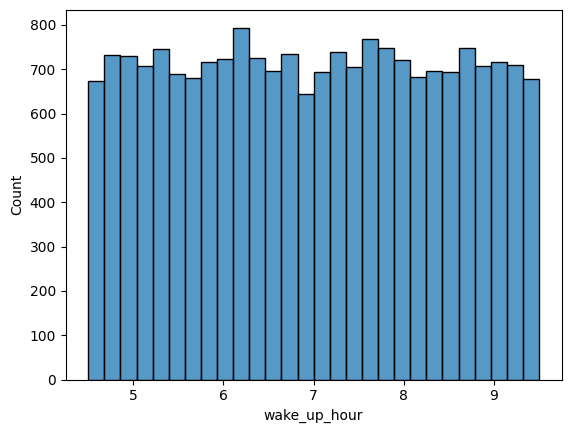

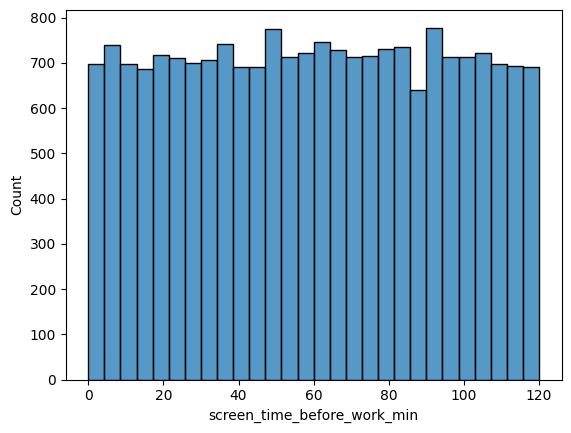

In [64]:
for i in int_cols:
  sns.histplot(df[i])
  plt.show()

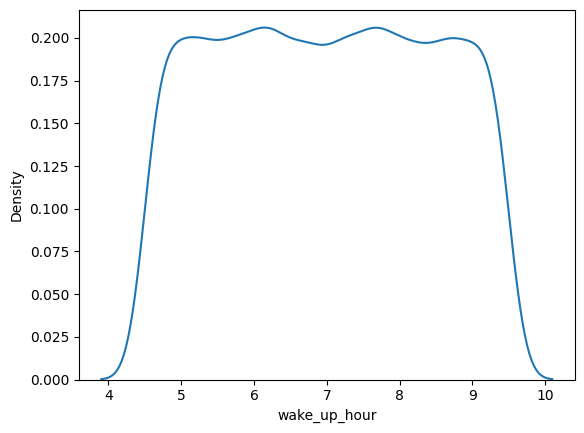

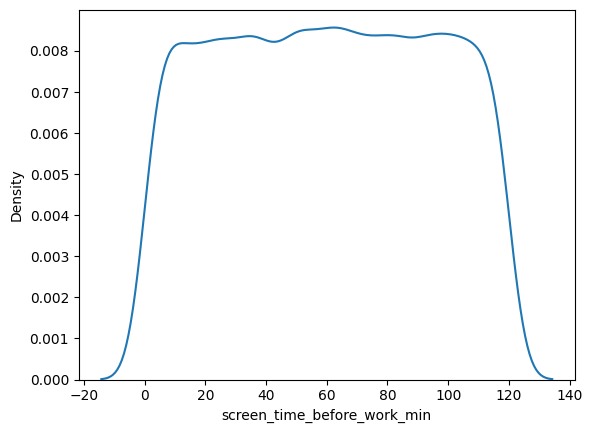

In [65]:
for i in int_cols:
  sns.kdeplot(df[i])
  plt.show()

In [66]:
df['wake_up_hour'].skew()

np.float64(0.0036599100954947694)

In [67]:
df['screen_time_before_work_min'].skew()

np.float64(-0.004606256175187957)

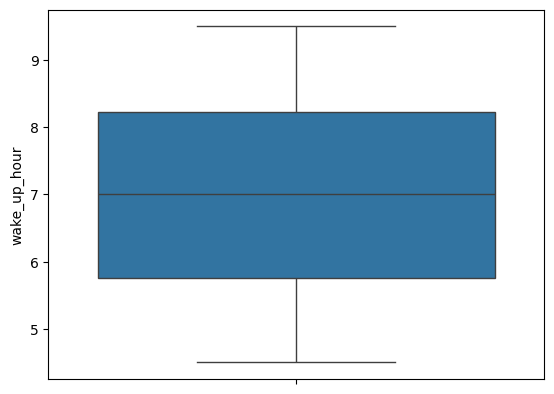

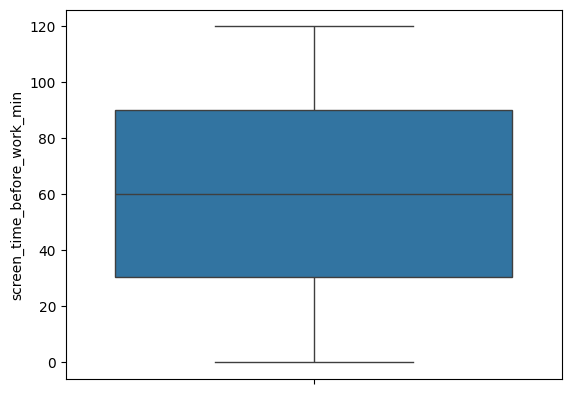

In [68]:
for i in int_cols:
  sns.boxplot(df[i])
  plt.show()

In [69]:
for i in int_cols:
 print(f"Missing value of {i} is:",df[i].isnull().sum())


Missing value of wake_up_hour is: 0
Missing value of screen_time_before_work_min is: 0


**conclusion**
- Both are approximately normally distributed
- There is no Outlier
- No missing value
- Range is 5-10 hour and 0-120 min

**univariate analysis for categorical columns**

In [70]:
cat_cols=df.select_dtypes(include='object').columns
cat_cols


Index(['exercise', 'meditation', 'breakfast'], dtype='object')

In [71]:
for i in cat_cols:
  print(df[i].value_counts())

exercise
Yes    10145
No      9855
Name: count, dtype: int64
meditation
No     10039
Yes     9961
Name: count, dtype: int64
breakfast
Yes    10082
No      9918
Name: count, dtype: int64


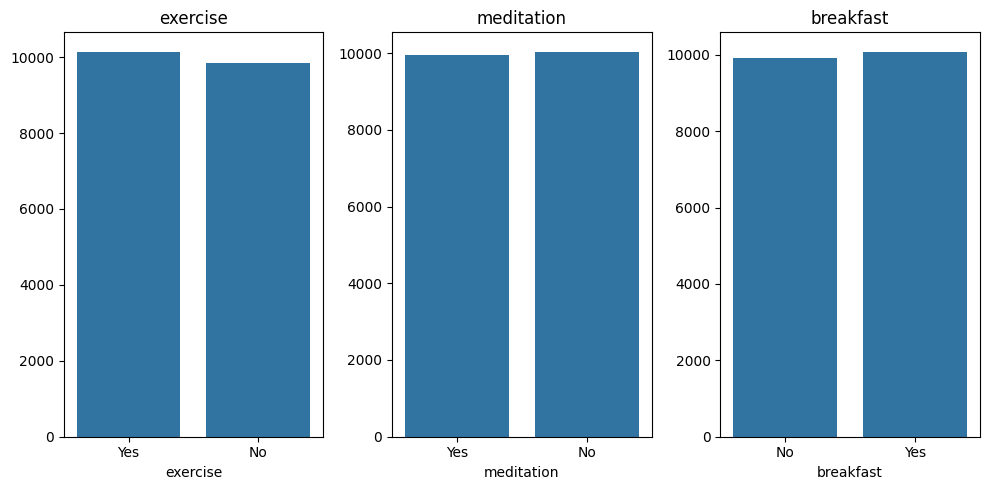

In [72]:
plt.figure(figsize=(10, 5))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(1, len(cat_cols), i)
    sns.countplot(data=df, x=col)
    plt.title(col)
    plt.ylabel('')

plt.tight_layout()
plt.show()

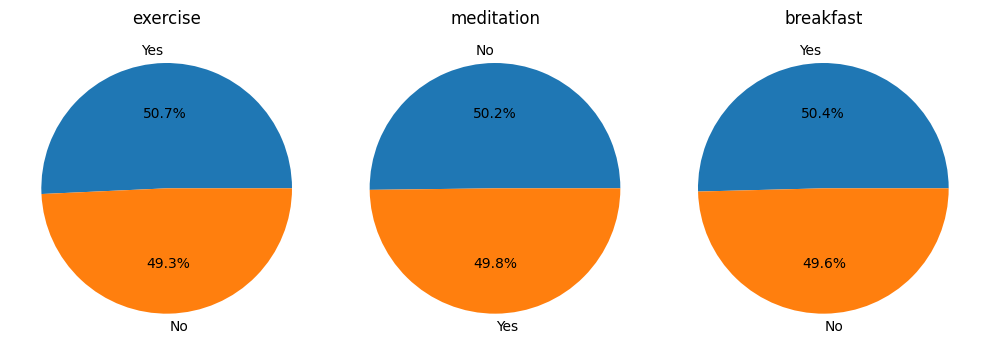

In [73]:
plt.figure(figsize=(10, 5))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(1, len(cat_cols), i)
    df[col].value_counts().plot.pie(
        autopct='%1.1f%%'
    )
    plt.title(col)
    plt.ylabel('')

plt.tight_layout()
plt.show()

In [74]:
for i in cat_cols:
 print(f"Missing value of {i} is:",df[i].isnull().sum())

Missing value of exercise is: 0
Missing value of meditation is: 0
Missing value of breakfast is: 0


**conclusion**

- Every Thing is perfect here .I think just we have to do encoding

# Bivariate Analysis

In [75]:
df[['wake_up_hour', 'screen_time_before_work_min', 'productivity_score']].corr()

,wake_up_hour,screen_time_before_work_min,productivity_score
wake_up_hour,1.000000,-0.007998,-0.625896
screen_time_before_work_min,-0.007998,1.000000,-0.469988
productivity_score,-0.625896,-0.469988,1.000000


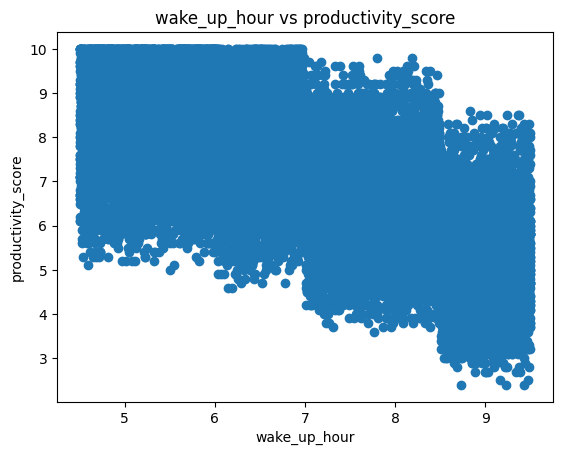

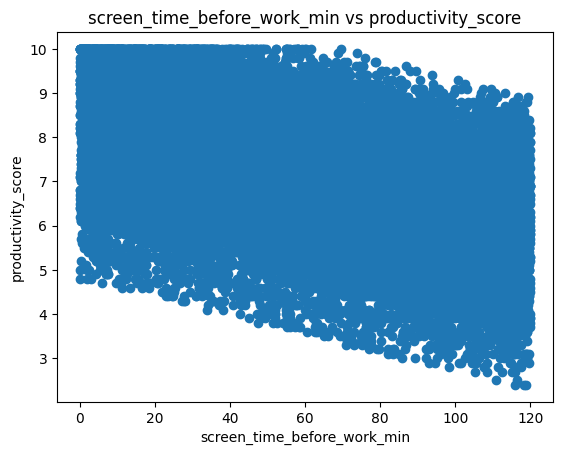

In [76]:
num_cols = ['wake_up_hour', 'screen_time_before_work_min']

for col in num_cols:
    plt.scatter(df[col], df['productivity_score'])
    plt.xlabel(col)
    plt.ylabel('productivity_score')
    plt.title(f'{col} vs productivity_score')
    plt.show()

**Conclusion**
- negatively correlated

In [77]:
pd.crosstab(df['exercise'], df['meditation'], normalize='index')

meditation,No,Yes
exercise,,
No,0.496195,0.503805
Yes,0.507541,0.492459


In [78]:
df.groupby(['exercise','meditation'])['productivity_score'].agg(['mean', 'median', 'std'])

mean  median       std
exercise meditation                            
No       No          5.880225     6.0  1.285741
         Yes         6.934502     7.0  1.282987
Yes      No          7.162148     7.2  1.299494
         Yes         8.161169     8.2  1.220552

**It is a clear indication that productivity is increasing when exercise and meditation are performed**

**Feature Engineering**

In [79]:
df['early_riser'] = (df['wake_up_hour'] < 7).astype(int)

**Again split num_feature and categorical feature**

In [80]:
num_features = ['wake_up_hour', 'screen_time_before_work_min']
categorical_features = ['exercise', 'meditation', 'breakfast', 'early_riser']

#pipeline

In [81]:
num_transformer = Pipeline (
    steps = [
        ('scaler', StandardScaler())
    ]
)

In [82]:
cat_transformer = Pipeline( steps = [
    ('encoder',OneHotEncoder(handle_unknown='ignore'))
] )

In [83]:
preprocessor = ColumnTransformer(
    transformers= [
        ('num',num_transformer,num_features),
        ('cat',cat_transformer,categorical_features)
    ]
    )



# Train_test Split

In [84]:
X=df.drop('productivity_score',axis=1)
y=df['productivity_score']
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


# base learner

In [85]:
reg_lr = LinearRegression()
reg_rf = RandomForestRegressor( n_estimators=100, random_state=42 )
reg_gb = GradientBoostingRegressor( n_estimators=100 , random_state=42 )

In [86]:
voting_reg = VotingRegressor(
    estimators= [
        ('lr', reg_lr),
        ('rf',reg_rf),
        ('gb', reg_gb)
    ]
)

In [87]:
stacking_ridge = StackingRegressor(
    estimators= [
        ('rf',reg_rf),
        ('gb', reg_gb)
    ],
    final_estimator= Ridge()
)


In [88]:
stacking_lasso = StackingRegressor(
    estimators= [
        ('rf',reg_rf),
        ('gb', reg_gb)
    ],
    final_estimator= Lasso()
)

In [89]:
model_to_train = {
    'Linear Regression' : reg_lr,
    'Random Forest' : reg_rf,
    'Gradient Boosting': reg_gb,
    'Voting Ensemble ' : voting_reg,
    'Stacking Ensemble R ' : stacking_ridge,
    'Stacking Ensemble L ' : stacking_lasso
}



In [90]:
result = []

for name , model in model_to_train.items():

  pipe = Pipeline(
      [
          ('preprocessor', preprocessor),
          ('model',model)
      ]
  )


  pipe.fit(x_train,y_train)

  y_pred = pipe.predict(x_test)

  r2 = r2_score(y_test,y_pred)
  rmse = np.sqrt(mean_squared_error(y_test,y_pred))
  mae = mean_absolute_error(y_test,y_pred)

  result.append({
      "Model": name,
      "R2 Score" :r2,
      "RMSE": rmse,
      "MAE" : mae
  })

results_df = pd.DataFrame(result).sort_values("R2 Score", ascending=False)

print(results_df)

                  Model  R2 Score      RMSE       MAE
4  Stacking Ensemble R   0.954592  0.322058  0.270746
2     Gradient Boosting  0.954472  0.322482  0.270982
3      Voting Ensemble   0.950653  0.335735  0.279641
1         Random Forest  0.945416  0.353102  0.290789
0     Linear Regression  0.921710  0.422883  0.344556
5  Stacking Ensemble L   0.744909  0.763335  0.620919


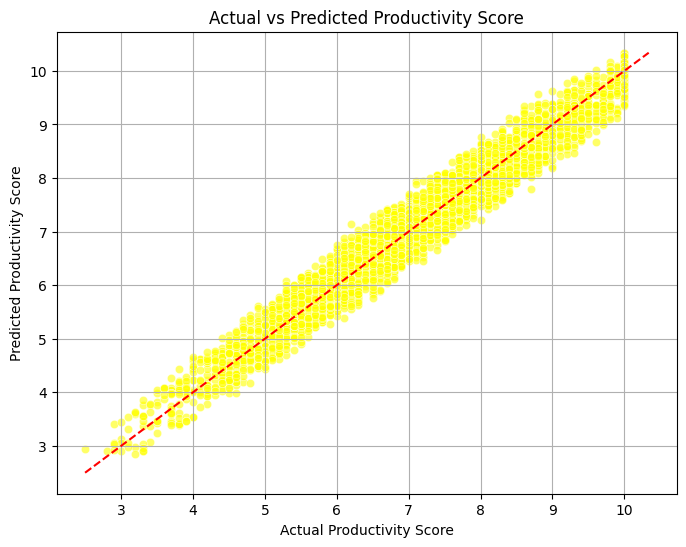

In [91]:
best_model_name = results_df.iloc[0]['Model']
best_model_obj = model_to_train[best_model_name]


final_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model',best_model_obj)
])

final_pipe.fit(x_train,y_train)
y_final_pred = final_pipe.predict(x_test)

plt.figure( figsize = (8,6) )

sns.scatterplot(x=y_test, y=y_final_pred, alpha = 0.6, color='yellow' )
min_val = min(y_test.min(), y_final_pred.min())
max_val = max(y_test.max(), y_final_pred.max())

plt.plot([min_val, max_val], [min_val, max_val],
         color='red', linestyle='--')

plt.xlabel("Actual Productivity Score")
plt.ylabel("Predicted Productivity Score")
plt.title("Actual vs Predicted Productivity Score")

plt.grid(True)
plt.show()

# Cross Validation

In [92]:
stacking_pipeline = Pipeline(
    [
        ('preprocessor',preprocessor),
        ('model',stacking_ridge)

     ]

  )

In [93]:

from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(
    stacking_pipeline,
    x_train,
    y_train,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs = -1
    )

stacking_rmse = np.sqrt(-cv_scores)

print(stacking_rmse)

[0.31879196 0.31478605 0.32090281 0.31779921 0.31813879]


# hyper parameter tuning


In [94]:
pip install optuna

In [95]:

import optuna
def objective(trial):
    params_grid = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 600),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2, log=True),
        'max_depth': trial.suggest_int('max_depth', 2, 5),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
    }

    model = GradientBoostingRegressor(
        **params_grid,
        random_state=42
    )

    pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    scores = cross_val_score(
        pipe,
        x_train,
        y_train,
        cv=5,
        scoring='r2',
        n_jobs=-1
    )

    return scores.mean()


In [96]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)

[I 2026-01-19 18:19:52,241] A new study created in memory with name: no-name-67462d97-7f67-4193-ae31-c10f8254fb85
[I 2026-01-19 18:20:26,739] Trial 0 finished with value: 0.955607497006634 and parameters: {'n_estimators': 298, 'learning_rate': 0.032673560811127884, 'max_depth': 4, 'min_samples_split': 3, 'min_samples_leaf': 3, 'subsample': 0.760449738409904}. Best is trial 0 with value: 0.955607497006634.
[I 2026-01-19 18:20:42,176] Trial 1 finished with value: 0.9453912930944183 and parameters: {'n_estimators': 303, 'learning_rate': 0.014882965243165276, 'max_depth': 3, 'min_samples_split': 5, 'min_samples_leaf': 2, 'subsample': 0.7989278553088839}. Best is trial 0 with value: 0.955607497006634.
[I 2026-01-19 18:21:20,918] Trial 2 finished with value: 0.9556295320787804 and parameters: {'n_estimators': 554, 'learning_rate': 0.015921124783641945, 'max_depth': 4, 'min_samples_split': 3, 'min_samples_leaf': 6, 'subsample': 0.9331730999991896}. Best is trial 2 with value: 0.95562953207878

In [97]:

trial = study.best_trial
print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

Accuracy: 0.9556295320787804
Best hyperparameters: {'n_estimators': 554, 'learning_rate': 0.015921124783641945, 'max_depth': 4, 'min_samples_split': 3, 'min_samples_leaf': 6, 'subsample': 0.9331730999991896}


In [98]:
optuna.visualization.plot_optimization_history(study)

In [99]:
optuna.visualization.plot_slice(study)

# Best Model is Gradient Boosting

In [100]:
best_model = GradientBoostingRegressor(
    **study.best_params,
    random_state=42
)
final_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', best_model)
])
final_pipe.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['wake_up_hour',
                                                   'screen_time_before_work_min']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['exercise', 'meditation',
                                                   'breakfast',
                                                   'early_riser'])])),
                ('model',
                 GradientBoostingRegressor(learning_rate=0.015921124783641945,
                                           max_depth=4, min_samples_leaf=6,
                                           min_samples_split=3,
                                           n_estimators=554, random_state=42,
                                           subsample=0.9331730999991896))])

# save the model and testing

In [105]:
from joblib import dump, load
dump(final_pipe, "gb_final.joblib")

['gb_final.joblib']

In [106]:
from joblib import load
gb_model = load("gb_final.joblib")

In [107]:
gb_model.predict(x_test)

array([7.28643797, 7.07302329, 8.30894695, ..., 7.99297529, 7.92350358,
       6.00543483])

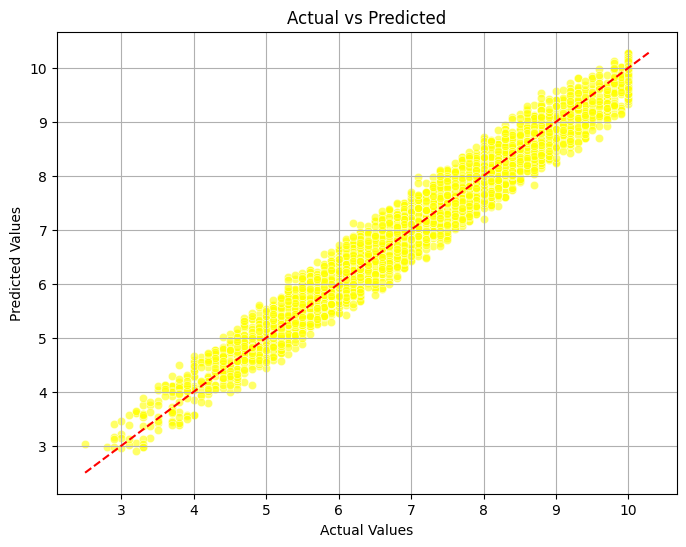

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

y_pred = gb_model.predict(x_test)

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6,color='yellow')
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val],
         color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.grid(True)
plt.show()